In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:
import zipfile
import pandas as pd

# Specify the path to your ZIP file
zip_file_path = '/content/Unemployment in India.zip'

# Specify the name of the CSV file you want to extract
csv_file_name = 'Unemployment in India.csv'  # or 'Unemployment_Rate_upto_11_2020.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  # Extract the desired CSV file to a temporary file
  with zip_ref.open(csv_file_name) as csv_file:
    # Read the CSV data using pandas
    data = pd.read_csv(csv_file)

# Now 'data' contains the data from the selected CSV file
print(data)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

In [ ]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
data.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
data.columns = ['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employee','Estimated Labour Participation','Area']

In [ ]:
#analysing top rows of dataset
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employee,Estimated Labour Participation,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


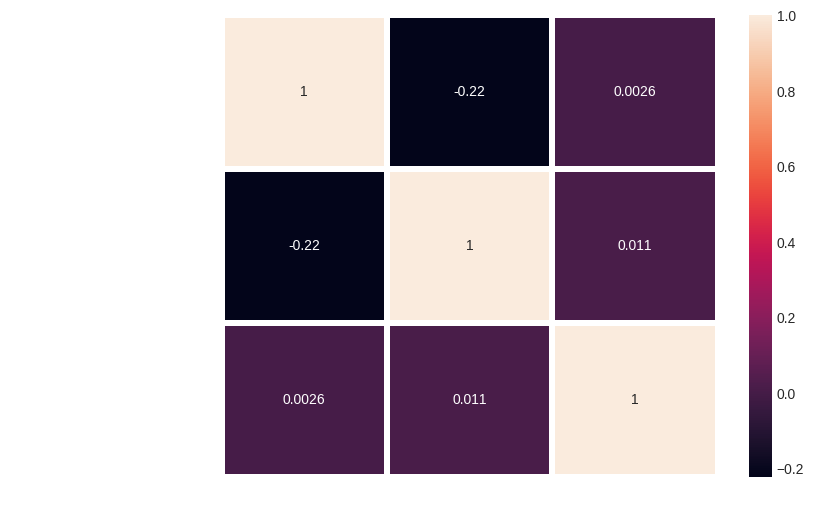

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting correlation heatmap
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,6))

# Compute the correlation matrix for numerical columns only
# The numeric_only=True argument is added to select only numerical columns for correlation calculation.
ax = sns.heatmap(data.corr(numeric_only=True), annot=True, linewidth=3)

#Set tick parameters
ax.tick_params(size=10, color='w', labelsize=10, labelcolor='w')

plt.show()

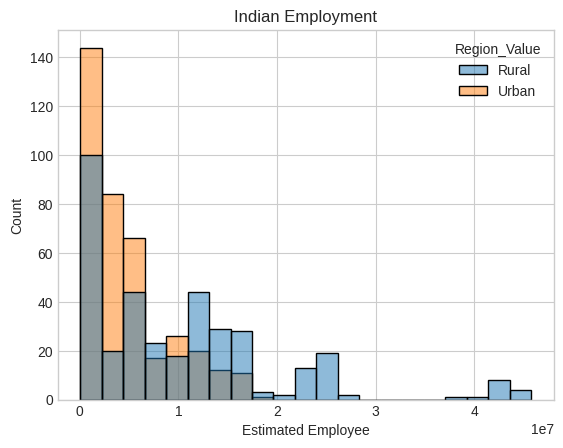

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Area' column contains the region information
# If not, replace 'Area' with the actual column name containing regions

# Convert data to long-form using melt
data_long = data.melt(id_vars=['Estimated Employee'],
                      value_vars=['Area'],
                      var_name='Region',
                      value_name='Region_Value')

# Plotting histplot
plt.title('Indian Employment')
# Use the long-form data and specify 'Region_Value' for hue
sns.histplot(x='Estimated Employee', hue='Region_Value', data=data_long)
plt.show()

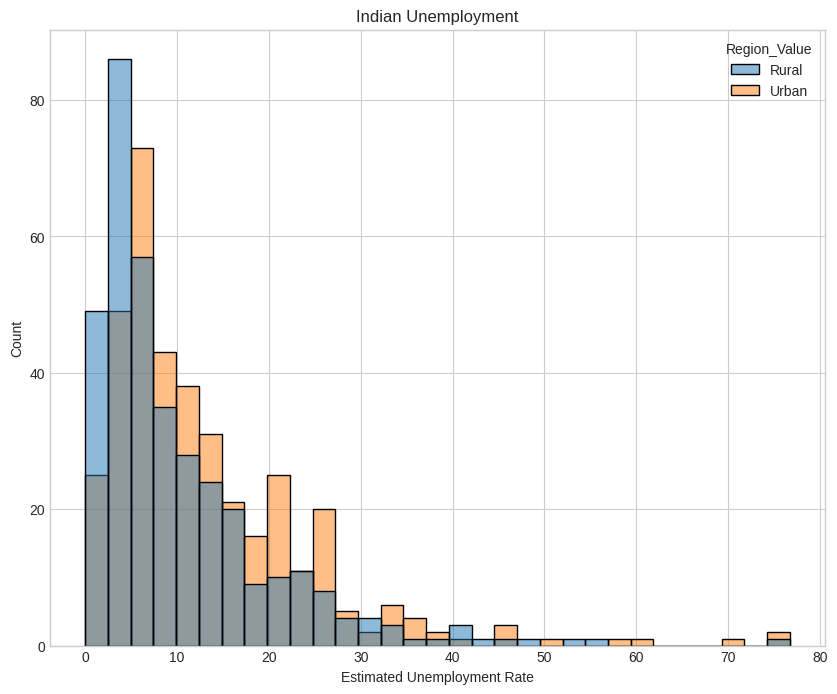

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Area' column contains the region information
# If not, replace 'Area' with the actual column name containing regions

# Convert data to long-form using melt, including 'Estimated Unemployment Rate'
data_long = data.melt(id_vars=['Estimated Employee', 'Estimated Unemployment Rate'], # Include 'Estimated Unemployment Rate'
                      value_vars=['Area'],
                      var_name='Region',
                      value_name='Region_Value')

# Plotting histplot
plt.figure(figsize=(10, 8))
plt.title("Indian Unemployment")
# Use the long-form data and specify 'Region_Value' for hue
sns.histplot(x="Estimated Unemployment Rate", hue="Region_Value", data=data_long)
plt.show()

In [ ]:
# dashboard to analyze the unemployment rate of each indian state

Dashboard to analyse the unemployment rate of each Indian state

In [ ]:
!pip install plotly
import plotly.express as px # Import plotly.express and give it alias 'px'

# Create a subset of the original DataFrame with the necessary columns
unemployment = data[['States', 'Area', 'Estimated Unemployment Rate']]
# Rename the 'Area' column to 'Region_Value'
unemployment = unemployment.rename(columns={'Area': 'Region_Value'})

# Remove rows where 'Estimated Unemployment Rate' is null or NaN
# or has the same value as its parent to handle duplicates
unemployment = unemployment.dropna(subset=['Estimated Unemployment Rate'])
unemployment.drop_duplicates(subset=['Region_Value', 'States'], keep='first', inplace=True)

# Group data by region and state and sum the values of 'Estimated Unemployment Rate'
unemployment = unemployment.groupby(['Region_Value', 'States'])['Estimated Unemployment Rate'].sum().reset_index()


# Plotting sunburst
figure = px.sunburst(unemployment, path=['Region_Value', 'States'],
                     values='Estimated Unemployment Rate',
                     width=900, height=1000,
                     color_continuous_scale='RdY1Gn',
                     title="Unemployment Rate in India")
figure.show()

In [ ]:
import plotly.express as px
fig = px.box(data, x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment Rate in India' ,template='seaborn')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
plot_unemp=data[['Estimated Unemployment Rate','States']]
data_unemployed=plot_unemp.groupby('States').mean().reset_index()
data_unemployed=data_unemployed.sort_values('Estimated Unemployment Rate')
fig=px.bar(data_unemployed,x='States',y='Estimated Unemployment Rate',color='States',title='Average unemployment rate in each state',template='seaborn')
fig.show()